# Lab: MNIST Deep Autoencoder

Welcome back! In this lab, you will extend the shallow autoencoder you built in the previous exercise. The model here will have a deeper network so it can handle more complex images.


In [1]:
# %tensorflow_version 2.x

import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def map_image(image, label):
  '''Normalizes and flattens the image. Returns image as input and label.'''
  image = tf.cast(image, dtype=tf.float32)
  image = image / 255.0
  image = tf.reshape(image, shape=(784,))

  return image, image

In [3]:
# Load the train and test sets from TFDS

BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

In [4]:
#Bulid the Model
def deep_autoencoder(inputs):
  encoder=tf.keras.layers.Dense(units=128,activation='relu')(inputs)
  encoder_layer1=tf.keras.layers.Dense(units=64,activation='relu')(encoder)
  encoder_layer2=tf.keras.layers.Dense(units=32,activation='relu')(encoder_layer1)
  decoder_layer1=tf.keras.layers.Dense(units=64,activation='relu')(encoder_layer2)
  decoder_layer2=tf.keras.layers.Dense(units=128,activation='relu')(decoder_layer1)
  decoder=tf.keras.layers.Dense(units=784,activation='sigmoid')(decoder_layer2)
  return encoder,decoder

# set the input shape
inputs=tf.keras.layers.Input(shape=(784,))

# get the encoder and decoder output
encoderoutput,decoderoutput=deep_autoencoder(inputs)

# setup the encoder Model because you will visualize its output later
encoder=tf.keras.Model(inputs=inputs,outputs=encoderoutput)
# setup the autoencoder Model
autoencoder=tf.keras.Model(inputs=inputs,outputs=decoderoutput)

In [5]:
autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(),loss='binary_crossentropy')

In [7]:
step=60000//BATCH_SIZE
his = autoencoder.fit(train_dataset,steps_per_epoch=step,epochs=50)

Epoch 1/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 0.2779
Epoch 2/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1359
Epoch 3/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.1182
Epoch 4/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1092
Epoch 5/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1037
Epoch 6/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.1007
Epoch 7/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0983
Epoch 8/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.0963
Epoch 9/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0946
Epoch 10/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.0932
Epoch 11/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0922
Epoch 12/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0909
Epoch 13/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0900
Epoch 14/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0892
Epoch 15/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 7

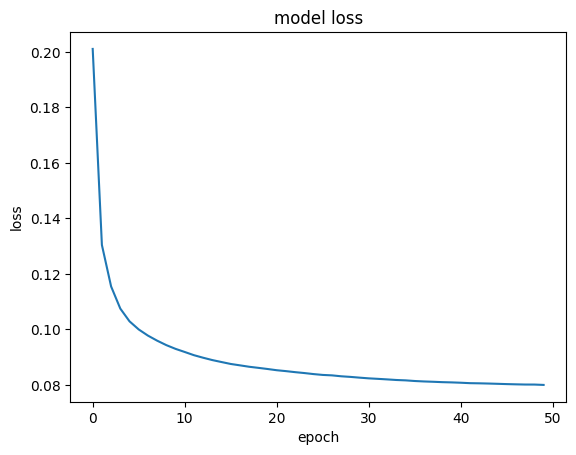

In [8]:
plt.plot(his.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [9]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Encoded shape: (128, 128)


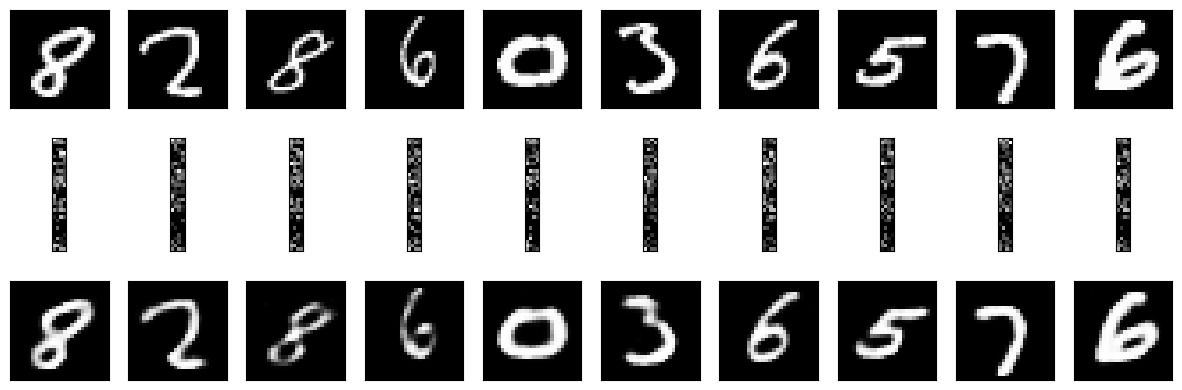

In [14]:
# take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE, size=10)

# get the encoder output
encoded_predicted = encoder.predict(test_dataset)

# get a prediction for the test batch
simple_predicted = autoencoder.predict(test_dataset)

# Check the shape of the encoded output
print(f"Encoded shape: {encoded_predicted.shape}")

# Modify `enc_shape` if needed based on the output of the encoder
enc_shape = (encoded_predicted.shape[1] // 4, 4)

# Display the results
display_results(output_samples[idxs], encoded_predicted[idxs], simple_predicted[idxs], enc_shape=enc_shape)